In [90]:
import random

import cv2
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np

import albumentations as A
import random
random.seed(30)

In [91]:
max_age = 116
# TRAINING_PATH = os.path.join('..', 'dataset', 'train_cropped.csv')
# VALID_PATH = os.path.join('..', 'dataset', 'valid_cropped.csv')
# train = pd.read_csv(TRAINING_PATH)
# valid = pd.read_csv(VALID_PATH)
# print('valid',len(train))
# print('train',len(valid))
# train.img_path = '../UTKface/'+ train.img_path
# valid.img_path = '../UTKface/'+ valid.img_path
# no_race_classes = train.race.unique().size
# df = pd.concat((train, valid))
# train.age = np.round(train.age * max_age,0)
# valid.age = np.round(valid.age * max_age,0)
# df.head()



data = pd.read_excel('UTKface_inthewild_annotated.xlsx')
data.head()
print(len(data))
# train.file_name = '../UTKface/'+ train.file_name

delet=['1_0_2_20161219161843718.jpg',
'2_0_4_20161221192934773.jpg',
'2_1_1_20170116231935539.jpg',
'5_1_0_20170117184912795.jpg',
'2_0_4_20161221192934773.jpg',
'2_1_1_20170116231935539.jpg',
'5_0_1_20170117193745507.jpg',
'5_0_3_20161220221842826.jpg',
'5_1_0_20170117184912795.jpg']
# train.drop(delet, inplace=True)
for i in delet:
    data.drop(data.loc[data['file_name']==i].index, inplace=True)
    
data = data.reset_index(drop = True) 
no_race_classes = data.race.unique().size

print(len(train))
data.file_name = '../UTKface/'+ train.file_name

msk = np.random.rand(len(data)) < 0.8
train = data[msk]
train = train.reset_index(drop = True) 

valid = data[~msk]
valid = valid.reset_index(drop = True) 


print('train',len(train))
print('valid',len(valid))

24050


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [34]:
q1, q3 = train.age.quantile([0.25,0.75]).to_list()
iqr = q3-q1
# train.ageN = (train.age - q1)/iqr
# train['ageN']= (train.age - q1)/iqr
# valid.ageN = (valid.age - q1)/iqr
# valid['ageN']= (train.age - q1)/iqr


In [35]:
train.head()

,img_path,age,gender,race
0,../UTKface/27_1_1_20170117013822716.jpg.chip.jpg,27.0,1,1
1,../UTKface/45_0_3_20170119201729135.jpg.chip.jpg,45.0,0,3
2,../UTKface/23_0_1_20170114034248958.jpg.chip.jpg,23.0,0,1
3,../UTKface/24_0_0_20170113142022092.jpg.chip.jpg,24.0,0,0
4,../UTKface/28_1_2_20170116170001611.jpg.chip.jpg,28.0,1,2


In [36]:
valid.head()

,img_path,age,gender,race
0,../UTKface/34_0_3_20170119200717205.jpg.chip.jpg,34.0,0,3
1,../UTKface/28_0_0_20170117202521375.jpg.chip.jpg,28.0,0,0
2,../UTKface/26_1_1_20170116223109423.jpg.chip.jpg,26.0,1,1
3,../UTKface/18_1_3_20170119155644533.jpg.chip.jpg,18.0,1,3
4,../UTKface/55_0_3_20170119171830808.jpg.chip.jpg,55.0,0,3


In [37]:
train.age.min(), train.age.max()

(1.0, 116.0)

In [38]:
valid.age.min(), valid.age.max()

(1.0, 116.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81779e3c50>,
      dtype=object)

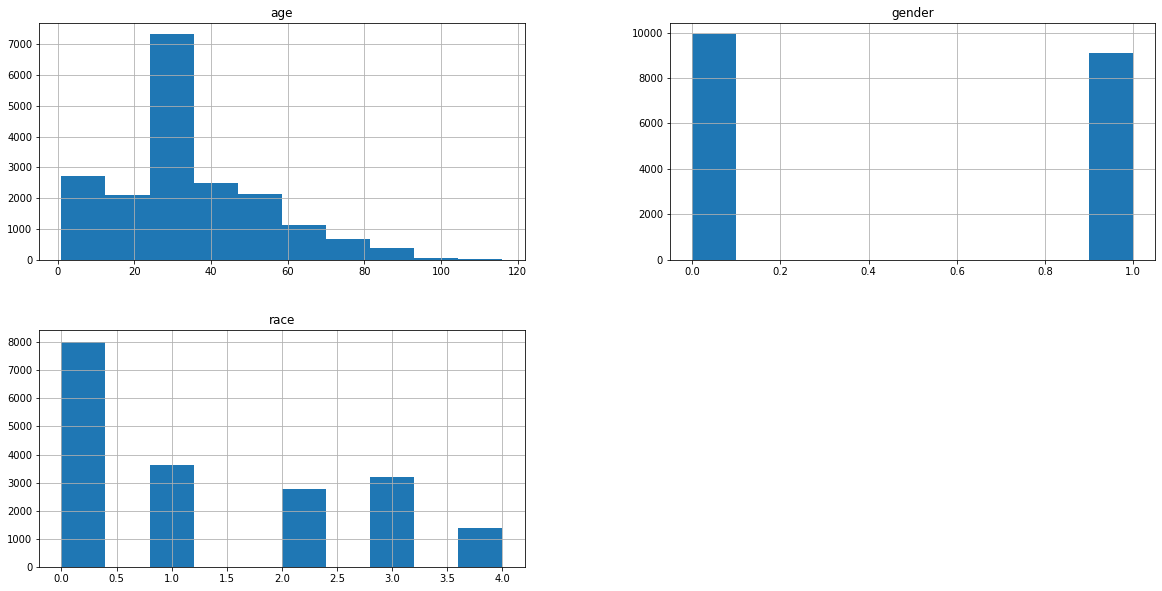

In [20]:
train.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8176818668>,
      dtype=object)

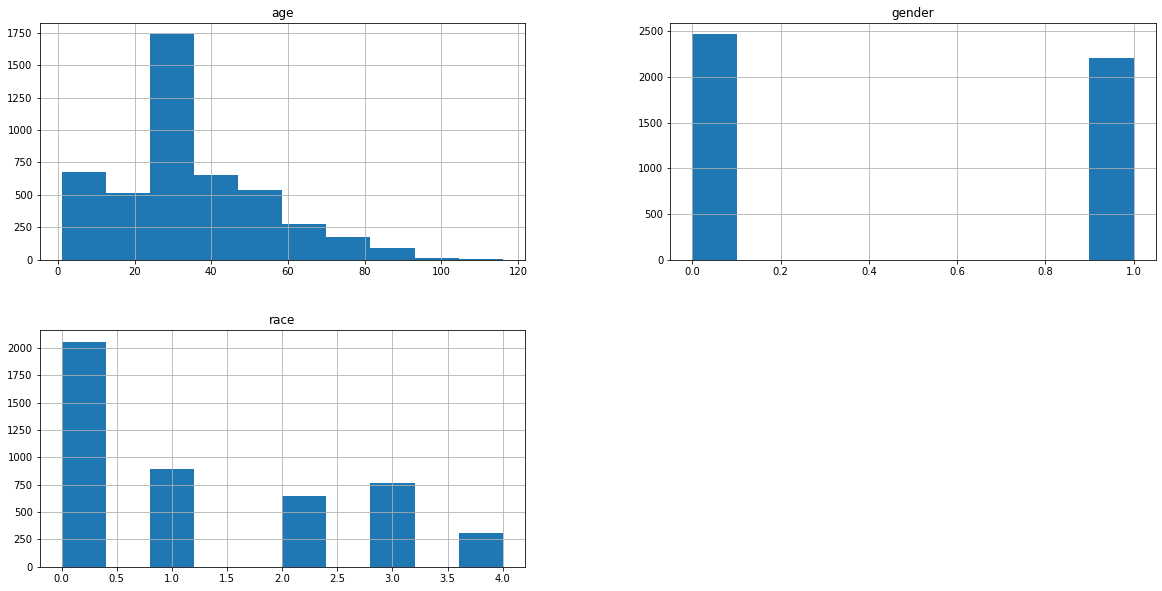

In [21]:
valid.hist(figsize=(20,10))

In [39]:
# df['age_5y_lable'] = (df.age//5).astype('int')
bin_edges = list(range(0,125,5))
bin_lables = list(range(0, len(bin_edges)-1))

train['age_fixed_5y_lable'] = pd.cut(np.array(train['age']), bins=bin_edges, labels=bin_lables)
train['age_fixed_5y_range'] = pd.cut(np.array(train['age']), bins=bin_edges)


In [41]:
train.head()

,img_path,age,gender,race,age_fixed_5y_lable,age_fixed_5y_range
0,../UTKface/27_1_1_20170117013822716.jpg.chip.jpg,27.0,1,1,5,"(25, 30]"
1,../UTKface/45_0_3_20170119201729135.jpg.chip.jpg,45.0,0,3,8,"(40, 45]"
2,../UTKface/23_0_1_20170114034248958.jpg.chip.jpg,23.0,0,1,4,"(20, 25]"
3,../UTKface/24_0_0_20170113142022092.jpg.chip.jpg,24.0,0,0,4,"(20, 25]"
4,../UTKface/28_1_2_20170116170001611.jpg.chip.jpg,28.0,1,2,5,"(25, 30]"


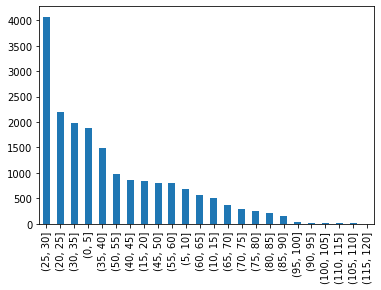

In [43]:
pd.value_counts(train['age_fixed_5y_range']).plot.bar()

In [44]:
pd.value_counts(train['age_fixed_5y_range'])

(25, 30]      4071
(20, 25]      2205
(30, 35]      1986
(0, 5]        1885
(35, 40]      1490
(50, 55]       986
(40, 45]       864
(15, 20]       846
(45, 50]       809
(55, 60]       793
(5, 10]        680
(60, 65]       559
(10, 15]       497
(65, 70]       376
(70, 75]       295
(75, 80]       248
(80, 85]       216
(85, 90]       152
(95, 100]       31
(90, 95]        21
(100, 105]       5
(110, 115]       4
(105, 110]       4
(115, 120]       3
Name: age_fixed_5y_range, dtype: int64

In [45]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 120]
bin_lables = list(range(0, len(bin_edges)-1))

train['Age_bin_custom_label'] = pd.cut(np.array(train['age']), bins=bin_edges, labels=bin_lables)
train['Age_bin_custom_range'] = pd.cut(np.array(train['age']), bins=bin_edges)


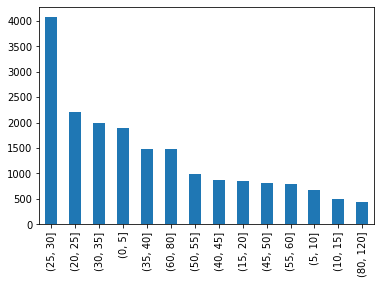

In [46]:
pd.value_counts(train['Age_bin_custom_range']).plot.bar()

In [48]:
df_r=pd.value_counts(train['Age_bin_custom_range']).rename_axis('Age_bin_custom_range').reset_index(name='counts')

In [66]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

#MultiplicativeNoise

In [67]:
def MultiplicativeNoise(image,t=3):
    images=[]
    if t>=1:
        imagea=A.MultiplicativeNoise(multiplier=0.5, p=1)(image=image)['image']
        images.append(imagea)
    if t>=2:
        imagea=A.MultiplicativeNoise(multiplier=1.5, p=1)(image=image)['image']
        images.append(imagea)
    if t>=3:
        imagea=A.MultiplicativeNoise(multiplier=[0.5, 1.5], per_channel=True, p=1)(image=image)['image']
        images.append(imagea)


    return  images
   

In [68]:
def Cutout(image,t=5):
    images=[]
    if t>=1:
        imagea=A.Cutout(num_holes=8, max_h_size=8, max_w_size=8, fill_value=0, p=1)(image=image)['image']
        images.append(imagea)
    if t>=2:
        imagea=A.Cutout(num_holes=10, max_h_size=8, max_w_size=8, fill_value=0, p=1)(image=image)['image']
        images.append(imagea)
    if t>=3:
        imagea=A.Cutout(num_holes=30, max_h_size=8, max_w_size=8, fill_value=64, p=1)(image=image)['image']
        images.append(imagea)
    if t>=4:
        imagea=A.Cutout(num_holes=50, max_h_size=8, max_w_size=8, fill_value=128, p=1)(image=image)['image']
        images.append(imagea)
    if t>=5:
        imagea=A.Cutout(num_holes=100, max_h_size=8, max_w_size=8, fill_value=255, p=1)(image=image)['image']
        images.append(imagea)
    
    return  images
   

In [69]:
def HorizontalFlip(image,t=1):
    images=[]
    
    imagea=A.HorizontalFlip(p=1)(image=image)['image']
    images.append(imagea)
 
    
    return  images
   

In [70]:
def Blur(image,t=3):
    images=[]
    if t>=1:
        imagea=A.Blur(blur_limit=(7, 7), p=1)(image=image)['image']
        images.append(imagea)
    if t>=2:
        imagea=A.Blur(blur_limit=(8, 8), p=1)(image=image)['image']
        images.append(imagea)

    if t>=3:
        imagea=A.Blur(blur_limit=(10, 10), p=1)(image=image)['image']
        images.append(imagea)
    
    
    return  images

In [236]:
image = cv2.imread('../UTKface/45_0_3_20170119201729135.jpg.chip.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# visualize(image)


# augmented_images = HorizontalFlip(image,6)
# for augmented_image in augmented_images:
#     visualize(augmented_image)

In [82]:
df_r

,Age_bin_custom_range,counts
0,"(25, 30]",4071
1,"(20, 25]",2205
2,"(30, 35]",1986
3,"(0, 5]",1885
4,"(35, 40]",1490
5,"(60, 80]",1478
6,"(50, 55]",986
7,"(40, 45]",864
8,"(15, 20]",846
9,"(45, 50]",809


In [149]:
df_au=train[(train['age']>25.0) & (train['age']<=30.0)]
(4071/len(df_au))-1

0.0

In [145]:
b=0
m=0
c=0
c+m+b+1

1

In [150]:
data=[]
for index, row in df_au.iterrows():
    data.append({'img_path':row['img_path']
                 ,'age':row['age']
                 ,'gender':row['gender']
                 ,'race':row['race'] })
    
#     image = cv2.imread(row['img_path'])
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     augmented_images = HorizontalFlip(image,6)
    
#     path='./../UTKface_aum/'+os.path.split(row['img_path'])[1]
#     psave=path+'.aug.HorizontalFlip.0.jpg'
#     cv2.imwrite(psave,augmented_images[0])
#     data.append({'img_path':psave
#              ,'age':row['age']
#              ,'gender':row['gender']
#              ,'race':row['race'] })


#     augmented_images = Cutout(image,c)
#     for i in range(len(augmented_images)):
#         psave=path+'.aug.Cutout.'+str(i)+'.jpg'
#         cv2.imwrite(psave,augmented_images[i])
#         data.append({'img_path':psave
#          ,'age':row['age']
#          ,'gender':row['gender']
#          ,'race':row['race'] })

#     augmented_images = MultiplicativeNoise(image,m)
#     for i in range(len(augmented_images)):
#         psave=path+'.aug.MultiplicativeNoise.'+str(i)+'.jpg'
#         cv2.imwrite(psave,augmented_images[i])
#         data.append({'img_path':psave
#          ,'age':row['age']
#          ,'gender':row['gender']
#          ,'race':row['race'] })
        
#     augmented_images = Blur(image,b)
#     for i in range(len(augmented_images)):
#         psave=path+'.aug.Blur.'+str(i)+'.jpg'
#         cv2.imwrite(psave,augmented_images[i])
#         data.append({'img_path':psave
#          ,'age':row['age']
#          ,'gender':row['gender']
#          ,'race':row['race'] })
dfObj = pd.DataFrame(data, columns = ['img_path' , 'age', 'gender' , 'race']) 

In [151]:
dfall = pd.concat((dfall, dfObj))

In [152]:
len(dfObj),len(dfall)


(4071, 56747)

In [153]:
dfall.to_csv('trainAug.csv',index=False)


In [154]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 120]
bin_lables = list(range(0, len(bin_edges)-1))

dfall['Age_bin_custom_label'] = pd.cut(np.array(dfall['age']), bins=bin_edges, labels=bin_lables)
dfall['Age_bin_custom_range'] = pd.cut(np.array(dfall['age']), bins=bin_edges)

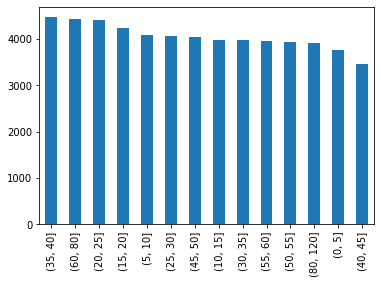

In [155]:
pd.value_counts(dfall['Age_bin_custom_range']).plot.bar()

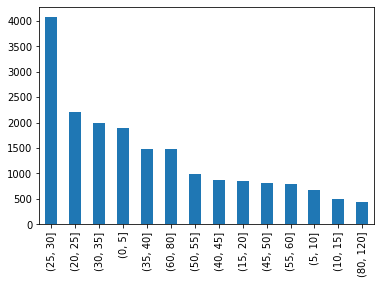

In [157]:
pd.value_counts(train['Age_bin_custom_range']).plot.bar()

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np
from facenet_pytorch import MTCNN
mtcnn = MTCNN(margin=0, select_largest=False,
              post_process=False, device='cuda:0',thresholds=[0.6, 0.7, 0.92])
train = pd.read_excel('UTKface_inthewild_annotated.xlsx')
train.head()
print(len(train))
# train.file_name = '../UTKface/'+ train.file_name

delet=['1_0_2_20161219161843718.jpg',
'2_0_4_20161221192934773.jpg',
'2_1_1_20170116231935539.jpg',
'5_1_0_20170117184912795.jpg',
'2_0_4_20161221192934773.jpg',
'2_1_1_20170116231935539.jpg',
'5_0_1_20170117193745507.jpg',
'5_0_3_20161220221842826.jpg',
'5_1_0_20170117184912795.jpg']
# train.drop(delet, inplace=True)
for i in delet:
    train.drop(train.loc[train['file_name']==i].index, inplace=True)
    
    
print(len(train))


24050
24044


In [179]:
train.file_name = '../UTKface/'+ train.file_name


In [180]:
train.head()

,file_name,Age,Gender,Race,Emotion,Hair Color,Glasses,Hijab,Niqab,Beard,Moustache,Mask,Hat,Headband,Makeup
0,../UTKface/100_0_0_20170112213500903.jpg,100,0,0,1.0,0.0,0,0,0,0,1,0,0,0,0
1,../UTKface/100_0_0_20170112215240346.jpg,100,0,0,1.0,0.0,0,0,0,0,0,0,0,0,0
2,../UTKface/100_1_0_20170110183726390.jpg,100,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0
3,../UTKface/100_1_0_20170112213001988.jpg,100,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,../UTKface/100_1_0_20170112213303693.jpg,100,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0


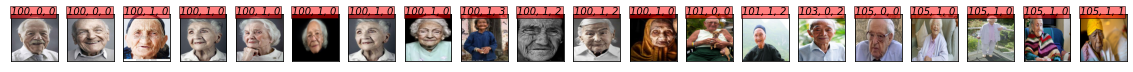

In [6]:



n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(0, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    img = cv2.imread(train.loc[i]['file_name'],cv2.IMREAD_COLOR)
    img =cv2.resize(img, (224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    ax.text(0.95, 0.01, '{}, {}, {}'.format(train['Age'][i], train['Gender'][i],train['Race'][i]), style='italic',
    bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})

    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

/home/ai/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


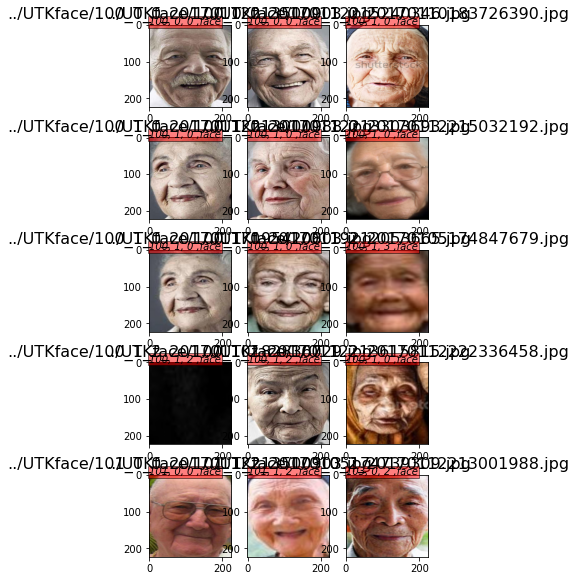

In [5]:

#mtcnn = MTCNN(margin=35, keep_all=True,select_largest=False, post_process=False,thresholds=[0.6, 0.7, 0.92])

# settings
nrows, ncols = 5, 3  # array of sub-plots
figsize = [ncols+2, nrows*2]     # figure size, inches


# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
ii=0
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    frame = cv2.imread(train.loc[i]['file_name'],cv2.IMREAD_COLOR)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    framea = Image.fromarray(frame)
    box, probs = mtcnn.detect(framea)
#     face = mtcnn(frame)
    f='face'
    if len(probs) <1:
        axi.imshow(frame)
        f='unface ' + str(len(probs))  
    else :
        box = [int(b) for b in box[0]]
        face=frame[box[1]:box[3], box[0]:box[2]]
        face =cv2.resize(face, (224,224))
        axi.imshow(face)
  
    # get indices of row/column

    # write row/col indices as axes' title for identification
    axi.set_title('{}'.format(train.loc[i]['file_name']), fontsize = 16) 
    axi.text(0.98, 0.01, '{}, {}, {} ,{}'.format(train['Age'][i], train['Gender'][i],train['Race'][i],f), style='italic',
    bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})    
    ii=ii+1

# one can access the axes by ax[row_id][col_id]
# do additional plotting on ax[row_id][col_id] of your choice

plt.tight_layout(True)
plt.show()

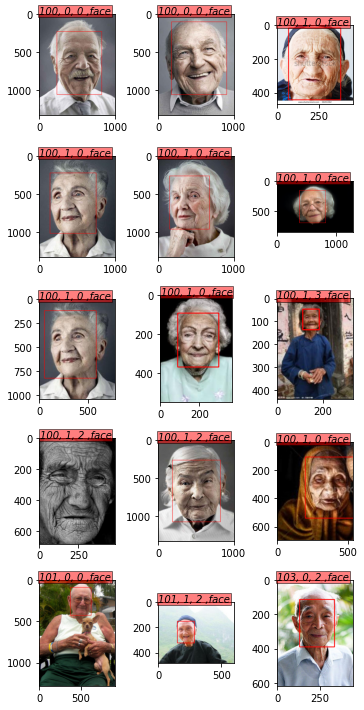

In [29]:

f='face'

# settings
nrows, ncols = 5, 3  # array of sub-plots
figsize = [ncols+2, nrows*2]     # figure size, inches


# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
ii=0
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    frame = cv2.imread(train.loc[i]['file_name'],cv2.IMREAD_COLOR)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    framea = Image.fromarray(frame)
    box, probs = mtcnn.detect(framea)
#   face = mtcnn(frame)
    f='face'
    if len(probs) <1:
        axi.imshow(frame)
        f='unface ' + str(len(probs))  
    else :
        box = [int(b) for b in box[0]]
        face=cv2.rectangle(frame,
              (box[0], box[1]),
              (box[2],  box[3]),
              (255,0,0),
              3)
#         face=frame[box[1]:box[3], box[0]:box[2]]
#         face =cv2.resize(face, (224,224))
        
        axi.imshow(face)


    # get indices of row/column

    # write row/col indices as axes' title for identification
    axi.text(0.98, 0.01, '{}, {}, {} ,{}'.format(train['Age'][i], train['Gender'][i],train['Race'][i],f), style='italic',
    bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})    
    ii=ii+1

# one can access the axes by ax[row_id][col_id]
# do additional plotting on ax[row_id][col_id] of your choice

plt.tight_layout(True)
plt.show()

In [54]:
from tqdm.notebook import tqdm
unface = 0;facea   = 0
error=[]
for i in tqdm(range(len(train))):
    try :
        frame = cv2.imread(train.loc[i]['file_name'],cv2.IMREAD_COLOR)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = Image.fromarray(frame)
        box, probs = mtcnn.detect(frame)
        if len(probs) < 1:
            error.append(train.loc[i]['file_name'])
#                 fig, axs = plt.subplots(1, 1, figsize=(15, 10))
#                 fig.tight_layout()
#                 axs.imshow(frame)
#                 axs.set_title(train.loc[i]['file_name'])
#                 axs.text(0.98, 0.05, '{}, {}, {} ,{}'.format(train['Age'][i], train['Gender'][i],train['Race'][i],f), style='italic',
#                 bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1}) 
            unface+=1
        else:facea+=1
      
    except Exception as e: print (str(e));print(train.loc[i]['file_name'])
                
facea,unface

OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

../UTKface/1_0_2_20161219161843718.jpg
OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

../UTKface/2_0_4_20161221192934773.jpg
OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

../UTKface/2_1_1_20170116231935539.jpg
OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

../UTKface/5_0_1_20170117193745507.jpg
OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

../UTKface/5_0_3_20161220221842826.jpg
OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

../UTKface/5_1_0_20170117184912

(24044, 0)

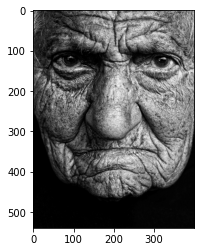

None



AttributeError: 'NoneType' object has no attribute 'numpy'

In [111]:

for i in tqdm(range(181,len(train))):
    try :
        frame = cv2.imread(train.loc[i]['file_name'],cv2.IMREAD_COLOR)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        framea = Image.fromarray(frame)
#       box, probs = mtcnn.detect(framea)
        box = mtcnn(framea)
        plt.imshow(frame)
        plt.show()

    except Exception as e: 
      
        print(train.loc[i]['file_name'])

#     if len(probs) ==0:
#         frame =cv2.resize(frame, (224,224))
#         plt.imshow(frame)
#         plt.show()
    box = mtcnn(framea)
    print(box)
    box = box.numpy()
    if len(box.shape)<3:
        frame =cv2.resize(frame, (224,224))
        plt.imshow(frame)
        plt.show()
        
#     else :
#         box = [0 if b<0 else int(b)  for b in box[0] ]
        
#         face=frame[box[1]:box[3], box[0]:box[2]]

#         face =cv2.resize(face, (224,224))
#         frame=cv2.rectangle(frame,
#         (box[0], box[1]),
#         (box[2],  box[3]),
#         (255,0,0),
#         3)
    
#         fig, axs = plt.subplots(1, 2, figsize=(15, 10))
#         fig.tight_layout()

#         axs[0].imshow(cv2.resize(frame, (224,224)))
#         axs[0].set_title(train.loc[i]['file_name'])
#         axs[0].text(0.98, 0.05, '{}, {}, {} ,{}'.format(train['Age'][i], train['Gender'][i],train['Race'][i],f), style='italic',
#             bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1}) 

#         axs[1].imshow(face)
#         axs[1].set_title(train.loc[i]['file_name'])
   

In [199]:
error=[]
margin=0.24
train = train.reset_index(drop = True) 

for i in tqdm(range(len(train))):
#     try:      
    frame = cv2.imread(train.loc[i]['file_name'],cv2.IMREAD_COLOR)
    #         rh,rw,_=frame.shape
    #         im=frame.copy()
    #         im2=frame.copy()
    save=frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)
    box, probs = mtcnn.detect(frame)

    if probs[0]==None:
        error.append(train.loc[i]['file_name'])
    else:
        box = [0 if b<0 else int(b)  for b in box[0] ]
        x, y, x1, y1 = box
    #             im=cv2.rectangle(im,(x,y),(x1,y1),(255,0,0),3)
    #             im = cv2.circle(im, (int((x1+x)/2),int((y1+y)/2)), radius=7, color=(255, 0, 0), thickness=-1)
    #             face=frame[y:y1,x:x1]

        h=  y1-y
        w=  x1-x
        #UTKfaceCut

        y = max(int(y-(margin*h)), 0)
        y1 = min(int(y1+(margin*h)), save.shape[0])

        x = max(int(x-(margin*w)), 0)
        x1 = min(int(x1+(w*margin)), save.shape[1])

        face2=save[y:y1,x:x1]
        psave='../UTKfaceCut/'+os.path.split(train.loc[i]['file_name'])[1]
        cv2.imwrite(psave,face2)


        #             im2=cv2.rectangle(im2,(x, y),(x1,y1),(255,0,0),3)
        #             im2 = cv2.circle(im2, (int((x1+x)/2),int((y1+y)/2)), radius=7, color=(255, 0, 0), thickness=-1)


        #             fig, axs = plt.subplots(1, 5, figsize=(15, 10))
        #             fig.tight_layout()

        #             axs[0].imshow(frame)
        #             axs[0].set_title(os.path.split(train.loc[i]['file_name'])[1])
        #             axs[0].text(0.98, 0.05, '{}, {}, {} ,{}'.format(train['Age'][i], train['Gender'][i],train['Race'][i],f), style='italic',
        #             bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1}) 

        #             axs[1].imshow(cv2.resize(im,(rw,rh)))
        #             axs[1].set_title('def')

        #             axs[2].imshow(cv2.resize(face,(rw,rh)))
        #             axs[2].set_title('cut')



        #             axs[3].imshow(cv2.resize(im2,(rw,rh)))
        #             axs[3].set_title('margin')

        #             axs[4].imshow(cv2.resize(face2,(rw,rh)))
        #             axs[4].set_title('face margin')
        
#     except Exception as e: 
#         error.append(train.loc[i]['file_name'])
#         print(box)
#         plt.imshow(frame)
#         plt.show()

      

                
error

['../UTKface/110_1_1_20170110155117522.jpg',
 '../UTKface/14_1_0_20170109214406209.jpg',
 '../UTKface/15_0_1_20170117135556256.jpg',
 '../UTKface/18_1_0_20170109212908376.jpg',
 '../UTKface/18_1_0_20170109214216731.jpg',
 '../UTKface/18_1_0_20170117133441179.jpg',
 '../UTKface/1_0_0_20161219195753899.jpg',
 '../UTKface/1_0_0_20161219200250923.jpg',
 '../UTKface/1_0_0_20170109193328570.jpg',
 '../UTKface/1_0_0_20170109193647852.jpg',
 '../UTKface/1_0_0_20170109194400094.jpg',
 '../UTKface/1_0_0_20170110212555368.jpg',
 '../UTKface/1_0_0_20170110212652648.jpg',
 '../UTKface/1_0_0_20170110212720644.jpg',
 '../UTKface/1_0_2_20161219140658208.jpg',
 '../UTKface/1_0_2_20161219140744200.jpg',
 '../UTKface/1_0_2_20161219155405989.jpg',
 '../UTKface/1_0_2_20161219161106398.jpg',
 '../UTKface/1_0_2_20161219161614550.jpg',
 '../UTKface/1_0_2_20161219161621566.jpg',
 '../UTKface/1_0_2_20161219162618670.jpg',
 '../UTKface/1_0_2_20161219200619172.jpg',
 '../UTKface/1_0_2_20161219201409620.jpg',
 '..

In [200]:
from numpy import asarray

# define data
data = asarray([error])
import pandas as pd 
pd.DataFrame(data.T).to_csv("error.csv",index=False)

In [209]:
error = pd.read_csv('error.csv')

for i in tqdm(range(len(error))):
    try:
        frame = cv2.imread('../error_cut/'+os.path.split(error.loc[i]['0'] )[1],cv2.IMREAD_COLOR)
        psave='../UTKfaceCut/'+os.path.split(error.loc[i]['0'])[1]
#         plt.imshow(frame)
#         plt.show()
        cv2.imwrite(psave,frame)

            
    except Exception as e: 
        print(error.loc[i]['0'])
#     cv2.imwrite(psave,frame)
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     plt.imshow(frame)
#     plt.show()
     #framea = Image.fromarray(frame)
#     box = mtcnn(framea)
#     box = box.numpy()
#     if len(box.shape)<3:
#         plt.imshow(frame)
#         plt.show()


../UTKface/1_0_2_20161219203439924.jpg
../UTKface/1_0_2_20161219212648582.jpg



In [205]:
error

,0
0,../UTKface/110_1_1_20170110155117522.jpg
1,../UTKface/14_1_0_20170109214406209.jpg
2,../UTKface/15_0_1_20170117135556256.jpg
3,../UTKface/18_1_0_20170109212908376.jpg
4,../UTKface/18_1_0_20170109214216731.jpg
...,...
89,../UTKface/90_0_1_20170111205407457.jpg
90,../UTKface/90_0_2_20170111210008312.jpg
91,../UTKface/90_1_0_20170110183149030.jpg
92,../UTKface/9_0_0_20170110220311291.jpg
